# Survey1(TIME, CONCERTO), Toy Model

### basic info

In [1]:
#
from sparse_tools import *
from survey_params import *

datadir = '/Volumes/Drive/sim_cii/data_sparse/toy/'
survey_param = survey1_param()
dth = survey_param.dth
nu_binedges = survey_param.nu_binedges
nu_bins = survey_param.nu_bins
line_use = [0,2,3,4,5,6]
line_name_arr = ['CII', 'CO(2-1)', 'CO(3-2)', 'CO(4-3)', 'CO(5-4)', 'CO(6-5)']
nu0_arr = [spec_lines.CII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(2).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(3).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(4).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(5).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(6).to(u.GHz, equivalencies=u.spectral()).value]
line_targ_vec = line_use

In [2]:
with open('data_internal/sparse_S1_dict.pickle','rb') as pfile:
    A, I_norm, z_coords, N_nu, N_z, sp2, z_coords_all, z_idx, I_coords_all = pickle.load(pfile)

### lightcone params

In [3]:
Neff_arr = [1]
sigI_arr = [1e3, 5e3, 1e4, 5e4]
sig_th_arr = [1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 10]
N_lc = 2500
N_sim = 100

param_dict = {}
param_dict['Neff'] = Neff_arr
param_dict['sigI'] = sigI_arr
param_dict['sig_th'] = sig_th_arr
with open(datadir + 'S1_param_dict.pickle','wb') as pfile:
    pickle.dump(param_dict, pfile)

### Generate ligh cones

skip this cell

=================

In [4]:
# iNeff = 0
# Neff_scale = Neff_arr[0]
# N_true, Itrue_all, Itrue_targ \
#    = gen_lightcone_toy(N_lc, dth, nu_binedges, sp2, z_coords_all, I_coords_all,\
#                        z_idx, line_use, line_targ_vec, Neff_scale = Neff_scale)
    
# np.save(datadir + 'N_true%d'%iNeff, N_true)
# np.save(datadir + 'Itrue_all%d'%iNeff, Itrue_all)
# np.save(datadir + 'Itrue_targ%d'%iNeff, Itrue_targ)

=================

In [4]:
iNeff = 0
N_true = np.load(datadir + 'N_true%d.npy'%iNeff)
Itrue_all = np.load(datadir + 'Itrue_all%d.npy'%iNeff)
Itrue_targ = np.load(datadir + 'Itrue_targ%d.npy'%iNeff)

### run MP

skip this cell

=================

In [10]:
# for i,sigI in enumerate(sigI_arr):
#     for j,sig_th in enumerate(sig_th_arr):
#         print('sigI = %.0e, sig_th = %.1f'%(sigI, sig_th))
#         Ipred_targ_arr = np.zeros([N_sim]+list(Itrue_targ.shape))
#         for isim in range(N_sim):
#             Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
#             N_pred = run_MP_sig(A, I_norm, Iobs_all, sigI, sig_th)
#             _, Ipred_targ = gen_Ipred(z_coords[sp2], N_pred[:,sp2], dth, 
#                                       nu_binedges, line_use, line_targ_vec, verbose = 0)    
#             Ipred_targ_arr[isim] = Ipred_targ
#             print(isim)
#         np.save(datadir + 'Ipred_targ_arr%d%d%d'%(iNeff, i, j),Ipred_targ_arr)

=================

## plot example map in one band

In [9]:
# run one set that has the same Iobs_all for different sig_th

sigI = 1e4
sigth_list = [10,5,1]
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
Ipred_targ_arr = np.zeros([3]+list(Itrue_targ.shape))
for j,sig_th in enumerate(sigth_list):
    N_pred = run_MP_sig(A, I_norm, Iobs_all, sigI, sig_th)
    _, Ipred_targ = gen_Ipred\
        (z_coords[sp2], N_pred[:,sp2], dth, nu_binedges, 
         line_use, line_targ_vec, verbose = 0)
    Ipred_targ_arr[j] = Ipred_targ

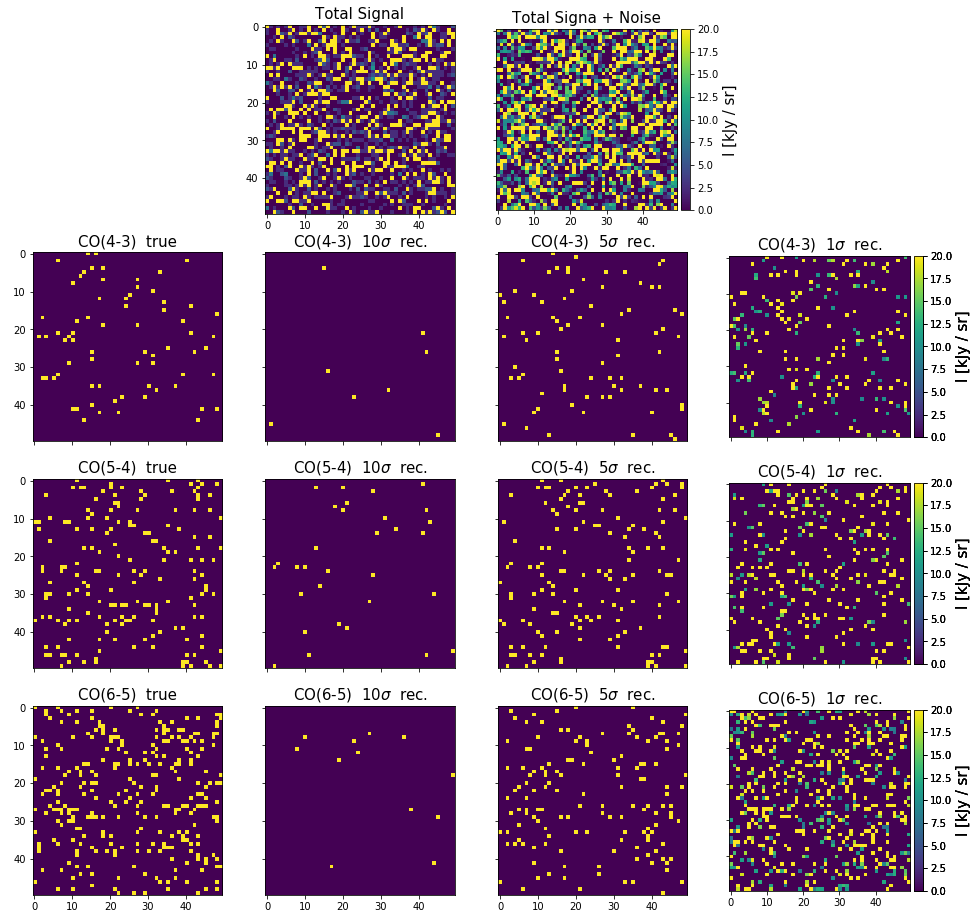

In [6]:
#
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(4,4, figsize = (16,16))
img1 = ax[0][1].imshow(Itrue_all[:,20].reshape(50,50)/1000, vmin = 0, vmax = 20)
img2 = ax[0][2].imshow(Iobs_all[:,20].reshape(50,50)/1000, vmin = 0, vmax = 20)
divider = make_axes_locatable(ax[0][2])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img2, cax=cax2)
cbar.set_label('I [kJy / sr]', fontsize = 15)
ax[0][1].set_title('Total Signal', fontsize = 15)
ax[0][2].set_title('Total Signa + Noise', fontsize = 15)
ax[0][2].get_yaxis().set_ticklabels([])
ax[0][3].axis('off')
ax[0][0].axis('off')

for i, (jtarg, vmax) in enumerate(zip([4,5,6], [20,20,20])):
    idx = line_targ_vec.index(jtarg)
    img1 = ax[i+1][0].imshow((Itrue_targ[idx,:,20]/1000).reshape(50,50), vmin = 0, vmax = vmax)
    ax[i+1][0].set_title(line_name_arr[idx] + '  true', fontsize = 15)
    if i != 2:
        ax[i+1][0].get_xaxis().set_ticklabels([])

for jj,sig_th in enumerate(sigth_list):
    for i, (jtarg, vmax) in enumerate(zip([4,5,6], [20,20,20])):
        idx = line_targ_vec.index(jtarg)
        img2 = ax[i+1][jj+1].imshow((Ipred_targ_arr[jj,idx,:,20]/1000).reshape(50,50), 
                                 vmin = 0, vmax = vmax)
        divider = make_axes_locatable(ax[i+1][3])
        cax2 = divider.append_axes("right", size="5%", pad=0.05)
        cbar = fig.colorbar(img2, cax=cax2)
        cbar.set_label('I [kJy / sr]', fontsize = 15)
        ax[i+1][jj+1].set_title(line_name_arr[idx] + \
                                '  %d'%sig_th + r'$\sigma$' +'  rec.', fontsize = 15)
        ax[i+1][jj+1].get_yaxis().set_ticklabels([])
        if i != 2:
            ax[i+1][jj+1].get_xaxis().set_ticklabels([])

plt.savefig('plots/paperfig/toy_im.pdf', bbox_inches = 'tight', dpi = 300)

## Plot VID

In [5]:
i = 1
sigI = sigI_arr[i]
j = 2
sig_th = sig_th_arr[j]
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
print('sigI = %.0e, sig_th = %.1f'%(sigI, sig_th))
Ipred_targ_arr = np.load(datadir + 'Ipred_targ_arr%d%d%d.npy'%(iNeff, i, j))

sigI = 5e+03, sig_th = 2.0


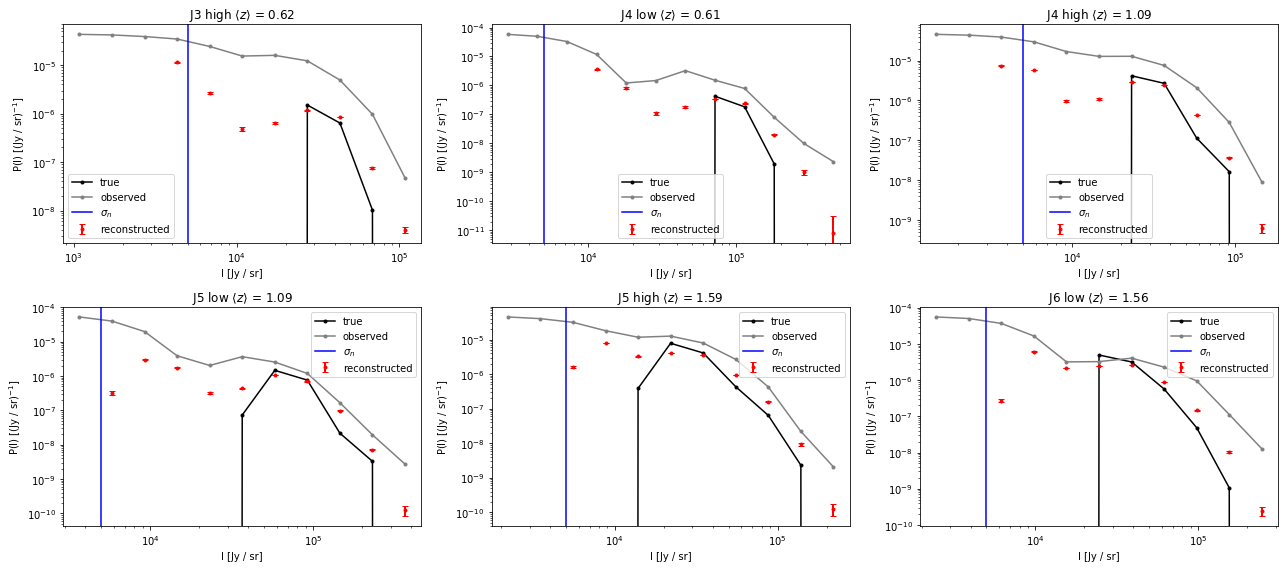

In [8]:
fig, ax = plt.subplots(2,3,figsize=(18,8))

pos = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
count = 0
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)

for jtarg in [3,4,5,6]:
    j_idx = line_use.index(jtarg)
    idx_vec, z_min_vec, z_max_vec, name_vec = survey_band_bins(jtarg, 'survey1')
    for _, (idx,z_min,z_max,name) in enumerate(zip(idx_vec, z_min_vec, z_max_vec, name_vec)):
        if count < len(pos):
            ii, jj = pos[count]
        count += 1
        hmin = np.max(Itrue_targ[j_idx, :, idx]) / 100
        hmax1 = np.max(Ipred_targ_arr[:, j_idx, :, idx])
        hmax2 = np.max(Itrue_targ[j_idx, :, idx])
        hmax = max(hmax1, hmax2)
        Ibinedges = np.arange(np.log10(hmin),np.log10(hmax) + 0.2 ,0.2)
        Ibinedges = 10**Ibinedges
        I_all = (Ibinedges[1:] + Ibinedges[:-1]) / 2
        dIbins = Ibinedges[1:] - Ibinedges[:-1]

        h_true, _ = np.histogram(Itrue_targ[j_idx, :, idx].flatten(), bins = Ibinedges)
        h_true = h_true / len(Itrue_targ[j_idx, :, idx].flatten()) / dIbins
        ax[ii][jj].plot(I_all, h_true, 'k.-', label = 'true')

        h_obs, _ = np.histogram(Iobs_all[:, idx].flatten(), bins = Ibinedges)
        h_obs = h_obs / len(Iobs_all[:, idx].flatten()) / dIbins
        ax[ii][jj].plot(I_all, h_obs, '.-', c = 'grey', label = 'observed')

        h_pred_arr = np.zeros([N_sim, len(Ibinedges) - 1])
        for n_idx in range(N_sim):
            dat_pred = Ipred_targ_arr[n_idx, j_idx, :, idx].flatten()
            h_pred, _ = np.histogram(dat_pred, bins = Ibinedges)
            h_pred = h_pred / len(dat_pred) / dIbins
            h_pred_arr[n_idx, :] = h_pred
        ax[ii][jj].errorbar(I_all, np.mean(h_pred_arr, axis = 0), \
                              np.std(h_pred_arr, axis = 0),  c = 'r', \
                              fmt = '.', capsize = 3, lw = 2, label = 'reconstructed')

        ax[ii][jj].axvline(sigI, c= 'b', ls = '-', label = '$\sigma_n$')
        ax[ii][jj].set_xscale('log')
        ax[ii][jj].set_yscale('log')
        ax[ii][jj].set_xlabel('I [Jy / sr]')
        ax[ii][jj].set_ylabel('P(I) [(Jy / sr)$^{-1}$]')
        ax[ii][jj].set_title(r'%s $\langle z \rangle$ = %.2f'\
                                         %(name, (z_min + z_max)/2))
        ax[ii][jj].legend(loc = 0)

plt.tight_layout()
plt.savefig('plots/paperfig/toy_VID.pdf', bbox_inches = 'tight', dpi = 300)

## Plot r - z

In [5]:
i = 2
sigI = sigI_arr[i]
j = 7
sig_th = sig_th_arr[j]
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
print('sigI = %.0e, sig_th = %.1f'%(sigI, sig_th))
Ipred_targ_arr = np.load(datadir + 'Ipred_targ_arr%d%d%d.npy'%(iNeff, i, j))

sigI = 1e+04, sig_th = 5.0


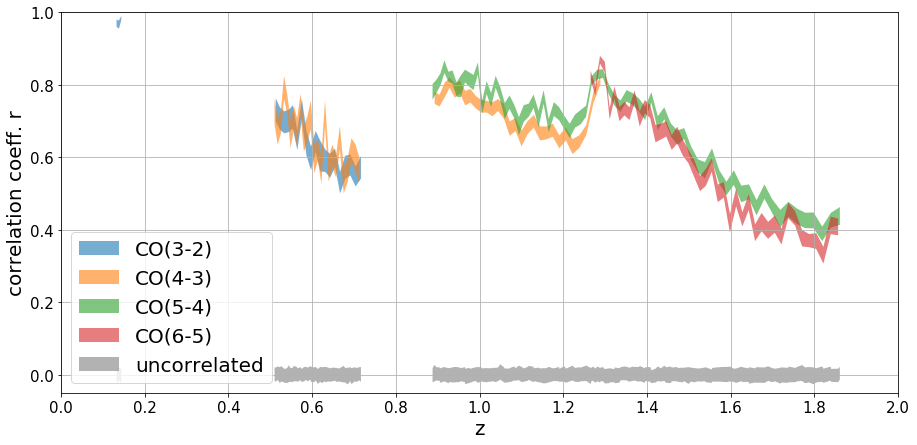

In [6]:
def find_bounds(inband):
    idxbounds = []

    pt1 = -1
    pt2 = -1
    ptc = 0
    while ptc < len(inband):
        if inband[ptc] and pt1 != -1:
            pt2 = ptc
        if inband[ptc] and pt1 == -1:
            pt1 = ptc
            pt2 = ptc
        if not inband[ptc] and pt1 !=-1:
            idxbounds.append([pt1, pt2])
            pt1 = -1
            pt2 = -1
        ptc += 1

    if pt1 != -1:
        idxbounds.append([pt1, pt2])
     
    return idxbounds

fig, ax = plt.subplots(1, 1, figsize = (15,7))

mucntot_list = []
sigcntot_list = []
ztot_list = []
c_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
for jtarg in [3,4,5,6]:
    j_idx = line_use.index(jtarg)
    inband, z_binedges = accessible_bands(nu_binedges, line_use, jtarg)
    zbins = (z_binedges[1:] + z_binedges[:-1]) / 2
    idxbounds = find_bounds(inband)
    
    subcount = 0
    for idxbound in idxbounds:
        subcount += 1
        idx_arr = np.arange(idxbound[0], idxbound[1] + 1)
        z_arr = zbins[idx_arr]
        mucp_arr = np.zeros(len(idx_arr))
        sigcp_arr = np.zeros(len(idx_arr))
        mucn_arr = np.zeros(len(idx_arr))
        sigcn_arr = np.zeros(len(idx_arr))
        
        for i, idx in enumerate(idx_arr):
            cp_arr = np.zeros(Ipred_targ_arr.shape[0])
            cn_arr = np.zeros(Ipred_targ_arr.shape[0])
            for isim in range(N_sim):
                mapt = Itrue_targ[j_idx, :, idx]
                mapp = Ipred_targ_arr[isim, j_idx, :, idx]
                mapn = np.random.normal(size = mapt.shape)
                mapt = mapt - np.mean(mapt)
                mapp = mapp - np.mean(mapp)
                mapn -= np.mean(mapn)
                if np.sum(mapt**2) > 0 and np.sum(mapp**2) > 0:
                    cp_arr[isim] = np.sum(mapt * mapp) / np.sqrt(np.sum(mapt**2) * np.sum(mapp**2))
                if np.sum(mapt**2) > 0 and np.sum(mapn**2) > 0:
                    cn_arr[isim] = np.sum(mapt * mapn) / np.sqrt(np.sum(mapt**2) * np.sum(mapn**2))
            
            mucp_arr[i] = np.mean(cp_arr)
            sigcp_arr[i] = np.std(cp_arr)
            mucn_arr[i] = np.mean(cn_arr)
            sigcn_arr[i] = np.std(cn_arr)
        
        mucntot_list += mucn_arr.tolist()
        sigcntot_list += sigcn_arr.tolist()
        ztot_list += z_arr.tolist()
        
        if subcount == 1:
            ax.fill_between(z_arr, mucp_arr - sigcp_arr, mucp_arr + sigcp_arr,\
                            facecolor = c_cycle[jtarg - 3],label = line_name_arr[j_idx], alpha = 0.6)
        else:
            ax.fill_between(z_arr, mucp_arr - sigcp_arr, mucp_arr + sigcp_arr,\
                            facecolor = c_cycle[jtarg - 3], alpha = 0.6)
            

ztot_list = np.array(ztot_list)
mucntot_list = np.array(mucntot_list)
sigcntot_list = np.array(sigcntot_list)
sortidx = ztot_list.argsort()
ztot_list = ztot_list[sortidx]
mucntot_list = mucntot_list[sortidx]
sigcntot_list = sigcntot_list[sortidx]

sp = np.where(ztot_list < 0.25)[0]
ax.fill_between(ztot_list[sp], mucntot_list[sp] - sigcntot_list[sp], \
                mucntot_list[sp] + sigcntot_list[sp], \
                alpha=0.6, facecolor='gray', label = 'uncorrelated')
sp = np.where((ztot_list > 0.25) & (ztot_list < 0.75))[0]
ax.fill_between(ztot_list[sp], mucntot_list[sp] - sigcntot_list[sp], \
                mucntot_list[sp] + sigcntot_list[sp], alpha=0.6, facecolor='gray')
sp = np.where(ztot_list > 0.75)[0]
ax.fill_between(ztot_list[sp], mucntot_list[sp] - sigcntot_list[sp], \
                mucntot_list[sp] + sigcntot_list[sp], alpha=0.6, facecolor='gray')

ax.legend(loc = 3, fontsize = 20)
ax.set_xlabel('z', fontsize = 20)
ax.set_xlim([0,2])
ax.set_ylim([-0.05,1])
ax.set_ylabel(r'correlation coeff. r', fontsize = 20)
ax.set_xticks(np.arange(0,2.2,0.2))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()
plt.savefig('plots/paperfig/toy_r.pdf', bbox_inches = 'tight', dpi = 300)

## Plot r - z (binary map)

In [7]:
i = 2
sigI = sigI_arr[i]
j = 7
sig_th = sig_th_arr[j]
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
print('sigI = %.0e, sig_th = %.1f'%(sigI, sig_th))
Ipred_targ_arr = np.load(datadir + 'Ipred_targ_arr%d%d%d.npy'%(iNeff, i, j))

sigI = 1e+04, sig_th = 5.0


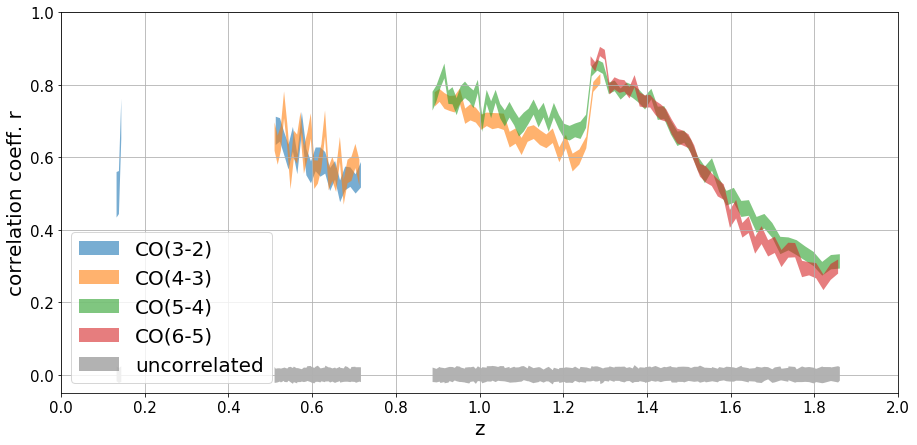

In [8]:
def find_bounds(inband):
    idxbounds = []

    pt1 = -1
    pt2 = -1
    ptc = 0
    while ptc < len(inband):
        if inband[ptc] and pt1 != -1:
            pt2 = ptc
        if inband[ptc] and pt1 == -1:
            pt1 = ptc
            pt2 = ptc
        if not inband[ptc] and pt1 !=-1:
            idxbounds.append([pt1, pt2])
            pt1 = -1
            pt2 = -1
        ptc += 1

    if pt1 != -1:
        idxbounds.append([pt1, pt2])
     
    return idxbounds

fig, ax = plt.subplots(1, 1, figsize = (15,7))

mucntot_list = []
sigcntot_list = []
ztot_list = []
c_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
for jtarg in [3,4,5,6]:
    j_idx = line_use.index(jtarg)
    inband, z_binedges = accessible_bands(nu_binedges, line_use, jtarg)
    zbins = (z_binedges[1:] + z_binedges[:-1]) / 2
    idxbounds = find_bounds(inband)
    
    subcount = 0
    for idxbound in idxbounds:
        subcount += 1
        idx_arr = np.arange(idxbound[0], idxbound[1] + 1)
        z_arr = zbins[idx_arr]
        mucp_arr = np.zeros(len(idx_arr))
        sigcp_arr = np.zeros(len(idx_arr))
        mucn_arr = np.zeros(len(idx_arr))
        sigcn_arr = np.zeros(len(idx_arr))
        
        for i, idx in enumerate(idx_arr):
            cp_arr = np.zeros(Ipred_targ_arr.shape[0])
            cn_arr = np.zeros(Ipred_targ_arr.shape[0])
            for isim in range(N_sim):
                mapt = Itrue_targ[j_idx, :, idx]
                mapp = Ipred_targ_arr[isim, j_idx, :, idx]
                maptb = np.zeros_like(mapt)
                maptb[mapt != 0] = 1.
                mappb = np.zeros_like(mapp)
                mappb[mapp != 0] = 1.
                mapt, mapp = maptb, mappb
                mapn = np.random.normal(size = mapt.shape)
                mapt = mapt - np.mean(mapt)
                mapp = mapp - np.mean(mapp)
                mapn -= np.mean(mapn)
                if np.sum(mapt**2) > 0 and np.sum(mapp**2) > 0:
                    cp_arr[isim] = np.sum(mapt * mapp) / np.sqrt(np.sum(mapt**2) * np.sum(mapp**2))
                if np.sum(mapt**2) > 0 and np.sum(mapn**2) > 0:
                    cn_arr[isim] = np.sum(mapt * mapn) / np.sqrt(np.sum(mapt**2) * np.sum(mapn**2))
            
            mucp_arr[i] = np.mean(cp_arr)
            sigcp_arr[i] = np.std(cp_arr)
            mucn_arr[i] = np.mean(cn_arr)
            sigcn_arr[i] = np.std(cn_arr)
        
        mucntot_list += mucn_arr.tolist()
        sigcntot_list += sigcn_arr.tolist()
        ztot_list += z_arr.tolist()
        
        if subcount == 1:
            ax.fill_between(z_arr, mucp_arr - sigcp_arr, mucp_arr + sigcp_arr,\
                            facecolor = c_cycle[jtarg - 3],label = line_name_arr[j_idx], alpha = 0.6)
        else:
            ax.fill_between(z_arr, mucp_arr - sigcp_arr, mucp_arr + sigcp_arr,\
                            facecolor = c_cycle[jtarg - 3], alpha = 0.6)
            

ztot_list = np.array(ztot_list)
mucntot_list = np.array(mucntot_list)
sigcntot_list = np.array(sigcntot_list)
sortidx = ztot_list.argsort()
ztot_list = ztot_list[sortidx]
mucntot_list = mucntot_list[sortidx]
sigcntot_list = sigcntot_list[sortidx]

sp = np.where(ztot_list < 0.25)[0]
ax.fill_between(ztot_list[sp], mucntot_list[sp] - sigcntot_list[sp], \
                mucntot_list[sp] + sigcntot_list[sp], \
                alpha=0.6, facecolor='gray', label = 'uncorrelated')
sp = np.where((ztot_list > 0.25) & (ztot_list < 0.75))[0]
ax.fill_between(ztot_list[sp], mucntot_list[sp] - sigcntot_list[sp], \
                mucntot_list[sp] + sigcntot_list[sp], alpha=0.6, facecolor='gray')
sp = np.where(ztot_list > 0.75)[0]
ax.fill_between(ztot_list[sp], mucntot_list[sp] - sigcntot_list[sp], \
                mucntot_list[sp] + sigcntot_list[sp], alpha=0.6, facecolor='gray')

ax.legend(loc = 3, fontsize = 20)
ax.set_xlabel('z', fontsize = 20)
ax.set_xlim([0,2])
ax.set_ylim([-0.05,1])
ax.set_ylabel(r'correlation coeff. r', fontsize = 20)
ax.set_xticks(np.arange(0,2.2,0.2))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()
plt.savefig('plots/paperfig/toy_r_binary.pdf', bbox_inches = 'tight', dpi = 300)

## Plot r in bands

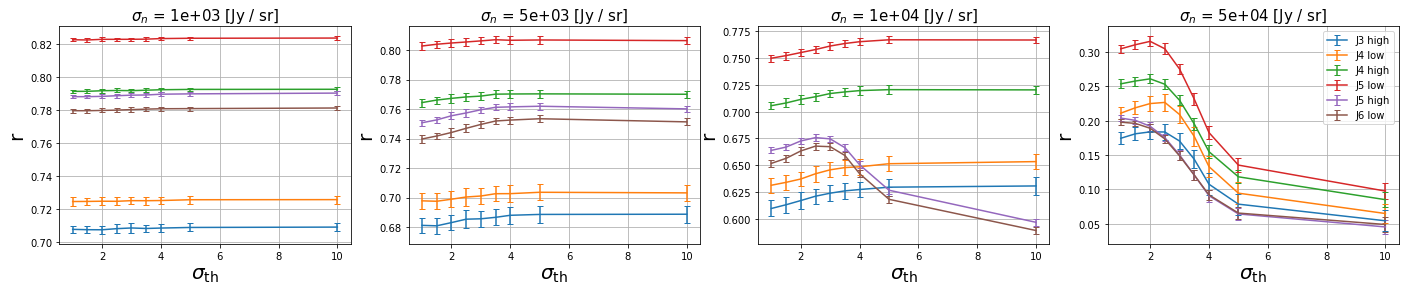

In [16]:
fig, ax = plt.subplots(1,4,figsize=(24,4))

for i,sigI in enumerate(sigI_arr):
    mus_list = []
    sigs_list = []
    for j,sig_th in enumerate(sig_th_arr):
        Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
        Ipred_targ_arr = np.load(datadir + 'Ipred_targ_arr%d%d%d.npy'%(iNeff, i, j))

        name_list = []
        mu_list = []
        sig_list = []
        for jtarg in [3,4,5,6]:
            j_idx = line_use.index(jtarg)
            idx_vec, z_min_vec, z_max_vec, name_vec = survey_band_bins(jtarg, 'survey1')

            for _, (idx,name) in enumerate(zip(idx_vec, name_vec)):
                name_list.append(name)

                mapt = Itrue_targ[j_idx, :, idx]
                mapt -= np.mean(mapt)
                cp_arr = np.zeros(Ipred_targ_arr.shape[0])
                for isim in range(N_sim):
                    mapp = Ipred_targ_arr[isim, j_idx, :, idx]
                    mapp -= np.mean(mapp)
                    if np.sum(mapt**2) > 0 and np.sum(mapp**2) > 0:
                        cp_arr[isim] = np.sum(mapt * mapp) / np.sqrt(np.sum(mapt**2) * np.sum(mapp**2))
                mu_list.append(np.mean(cp_arr))
                sig_list.append(np.std(cp_arr))
        
        mus_list.append(mu_list)
        sigs_list.append(sig_list)
        

    mus = np.array(mus_list)
    sigs = np.array(sigs_list)
    for jplot in range(mus.shape[1]):
        ax[i].errorbar(sig_th_arr,mus[:,jplot], sigs[:,jplot], fmt = '-', capsize = 3,\
                      label = name_list[jplot])

    ax[i].set_ylabel('r', fontsize = 20)
    ax[i].set_xlabel(r'$\sigma_{\rm th}$', fontsize = 20)
    ax[i].set_title(r'$\sigma_n$ = ' + '%.0e [Jy / sr]'%sigI, fontsize = 15)
    ax[i].yaxis.grid()
    ax[i].xaxis.grid()
ax[i].legend(loc = 0, fontsize = 10)
plt.savefig('plots/paperfig/toy_r_bands.pdf', bbox_inches = 'tight', dpi = 200)

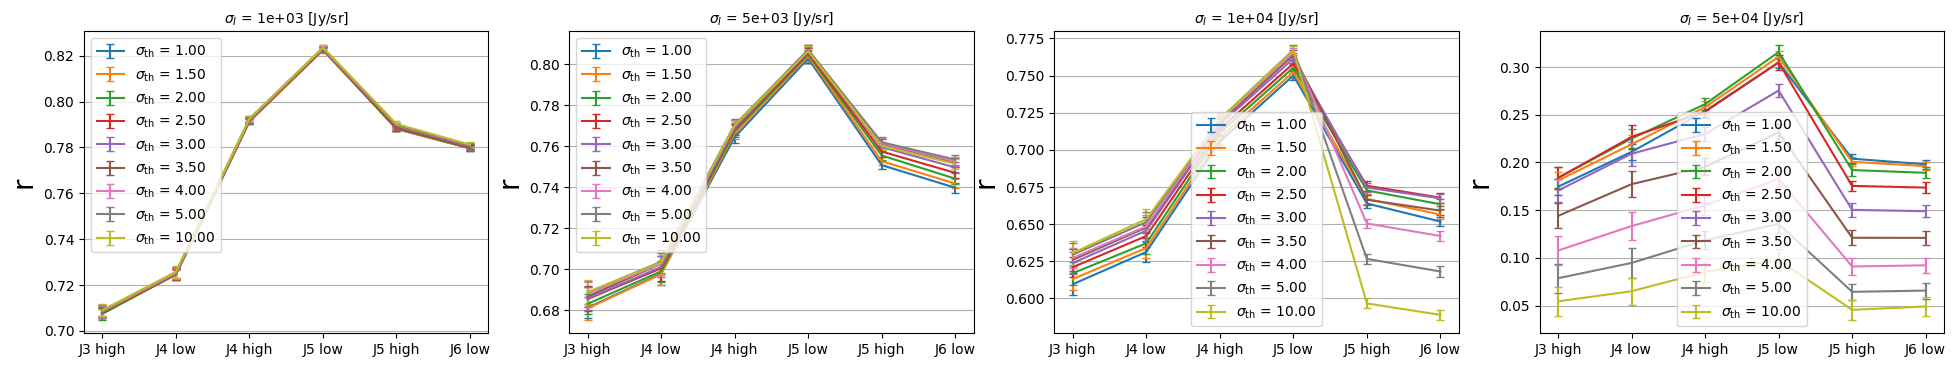

In [17]:
fig, ax = plt.subplots(1,4,figsize=(24,4), dpi = 100)

for i,sigI in enumerate(sigI_arr):
    for j,sig_th in enumerate(sig_th_arr):
        Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
        Ipred_targ_arr = np.load(datadir + 'Ipred_targ_arr%d%d%d.npy'%(iNeff, i, j))

        zmin_list = []
        zmax_list = []
        name_list = []
        mu_list = []
        sig_list = []
        for jtarg in [3,4,5,6]:
            j_idx = line_use.index(jtarg)
            idx_vec, z_min_vec, z_max_vec, name_vec = survey_band_bins(jtarg, 'survey1')

            for _, (idx,z_min,z_max,name) in enumerate(zip(idx_vec, z_min_vec, z_max_vec, name_vec)):
                zmin_list.append(z_min)
                zmax_list.append(z_max)
                name_list.append(name)

                mapt = Itrue_targ[j_idx, :, idx]
                mapt -= np.mean(mapt)
                cp_arr = np.zeros(Ipred_targ_arr.shape[0])
                for isim in range(N_sim):
                    mapp = Ipred_targ_arr[isim, j_idx, :, idx]
                    mapp -= np.mean(mapp)
                    if np.sum(mapt**2) > 0 and np.sum(mapp**2) > 0:
                        cp_arr[isim] = np.sum(mapt * mapp) / np.sqrt(np.sum(mapt**2) * np.sum(mapp**2))
                mu_list.append(np.mean(cp_arr))
                sig_list.append(np.std(cp_arr))

        ax[i].errorbar(np.arange(len(mu_list)), mu_list, sig_list, \
                       fmt = '-', capsize = 3,\
                      label = r'$\sigma_{\rm th}$ = ' + '%.2f'%sig_th)

    ax[i].legend(loc = 0, fontsize = 10)
    ax[i].set_xticks(np.arange(len(mu_list)))
    ax[i].set_xticklabels(name_list)
    ax[i].set_ylabel('r', fontsize = 20)
    ax[i].set_title(r'$\sigma_I$ = ' + '%.0e [Jy/sr]'%sigI, fontsize = 10)
    ax[i].yaxis.grid()
#plt.savefig('plots/paperfig/toy_r_bands.pdf', bbox_inches = 'tight', dpi = 300)